# Polynomial Regression Example

**Spencer Lyon**

*UCF MSDA Big Data Seminar*

July 24, 2020


- In this notebook we will look at an example of how feature engineering is necessary for ML success
- We'll start by importing some libraries and importing the dataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

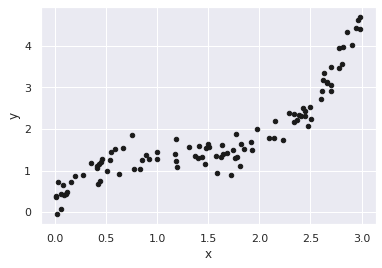

In [29]:
df = pd.read_csv("cubic_data.csv")
df.plot.scatter(x="x", y="y", color="k");

- We will now use the scikit-learn library to fit a linear model
- The model has the form $$y = w_0 + w_1 x$$

In [31]:
from sklearn import linear_model
from sklearn import metrics

In [32]:
mod = linear_model.LinearRegression()
mod.fit(df[["x"]], df["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
mod.intercept_, mod.coef_

(0.2869534114957024, array([0.99350208]))

- For this dataset, $w_0 = 0.2896$ and $w_1 = 0.9935$
- A common metric for regression tasks is the mean squared error:

In [34]:
linear_prediction = mod.predict(df[["x"]])
metrics.mean_squared_error(df["y"], linear_prediction)

0.27253591903962454

Below we will visualize the model and its fit

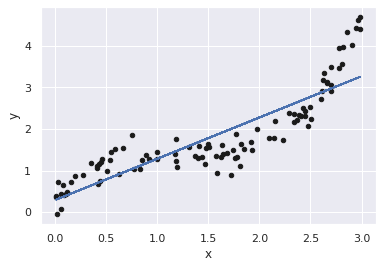

In [35]:
fig, ax = plt.subplots()
df.plot.scatter(x="x", y="y", ax=ax, color="k")
ax.plot(df["x"], linear_prediction);

- After examining the dataset, we see that there may be a cubic pattern (why?)
- Let's use sklearn to fit a cubic model of the form $$y = w_0 + w_1 x + w_2 x^2 + w_3 x^3$$

In [39]:
cubic = linear_model.LinearRegression()
features = df["x"].to_numpy()[:,None] ** np.array([1, 2, 3])[None, :]
cubic.fit(features, df["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

- Let's take a look a the coefficients and mse

In [41]:
cubic.intercept_, cubic.coef_

(0.2532178764135722, array([ 2.79738384, -2.28920167,  0.61766012]))

In [43]:
cubic_prediction = cubic.predict(features)
metrics.mean_squared_error(df["y"], cubic_prediction)

0.04901985301142532

This is a much better MSE

We can also visually see that the fit is better:

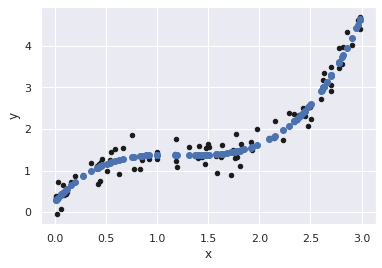

In [45]:
fig, ax = plt.subplots()
df.plot.scatter(x="x", y="y", ax=ax, color="k")
ax.scatter(df["x"], cubic_prediction);

## Outcome

- The cubic model fit this dataset far better than the linear model
- This was a contrived example (the data is a cubic polynomial, plus some noise)
- We knew the underlying relationship was cubic (domain expertiese) and transformed the data appropriately (feature enginnering)


## Neural Networks

- A common benefit of Neural networks is that they will do the feature engineering automatically
- Let's try it out on this simple dataset
- Don't worry about specifics of what the network is doing, we'll get back to that soon

In [48]:
from sklearn import neural_network

In [50]:
nn = neural_network.MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)

# fit with only x
nn.fit(df[["x"]], df["y"])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

- With linear models we could look at model weights (coefficients) to understand behavior
- There isn't an obvious/straightforward way to understand what the model is doing 

In [52]:
nn.coefs_

[array([[ 3.19400032e-01, -5.04383335e-01, -1.20466125e-03,
          6.27287424e-01,  3.86562837e-01, -1.43360552e-07,
          5.27210019e-01,  2.75765694e-02, -5.37998049e-01,
         -3.92446551e-01]]),
 array([[ 7.13502143e-02,  1.99434732e-01,  1.44509459e-01,
         -1.75586936e-02, -2.51901839e-01,  3.53855691e-01,
          2.37595464e-01, -3.34923028e-01,  1.31442230e-01,
          1.83865243e-01],
        [ 8.51155816e-02,  3.09976677e-01,  1.50303057e-01,
         -1.03345012e-01, -2.95056570e-01,  2.18175004e-01,
         -5.73284464e-02,  1.97242769e-01, -1.52370249e-02,
         -3.07135559e-01],
        [-3.23992683e-02, -1.75415717e-01,  3.14113562e-01,
         -3.68471773e-01,  3.62673047e-01,  1.95367637e-01,
         -1.32250120e-01, -3.51839817e-01,  1.68195868e-01,
         -3.61875560e-01],
        [-2.13410305e-01, -3.86212990e-01,  1.34823768e-01,
         -3.08122476e-06,  4.85441881e-01, -1.19323897e-01,
          2.14933414e-01,  3.87249052e-01, -3.4480

- This is known as *interpretability* and is something we will come back to
- For now we'll look a